In [798]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch
from torch import nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

1. Loading data

In [799]:
cols = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height","Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]
dataset = pd.read_excel("energy_efficient.xlsx", names=cols)

1.1 Exploratory Data Analysis

In [800]:
dataset.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [801]:
dataset.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [802]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


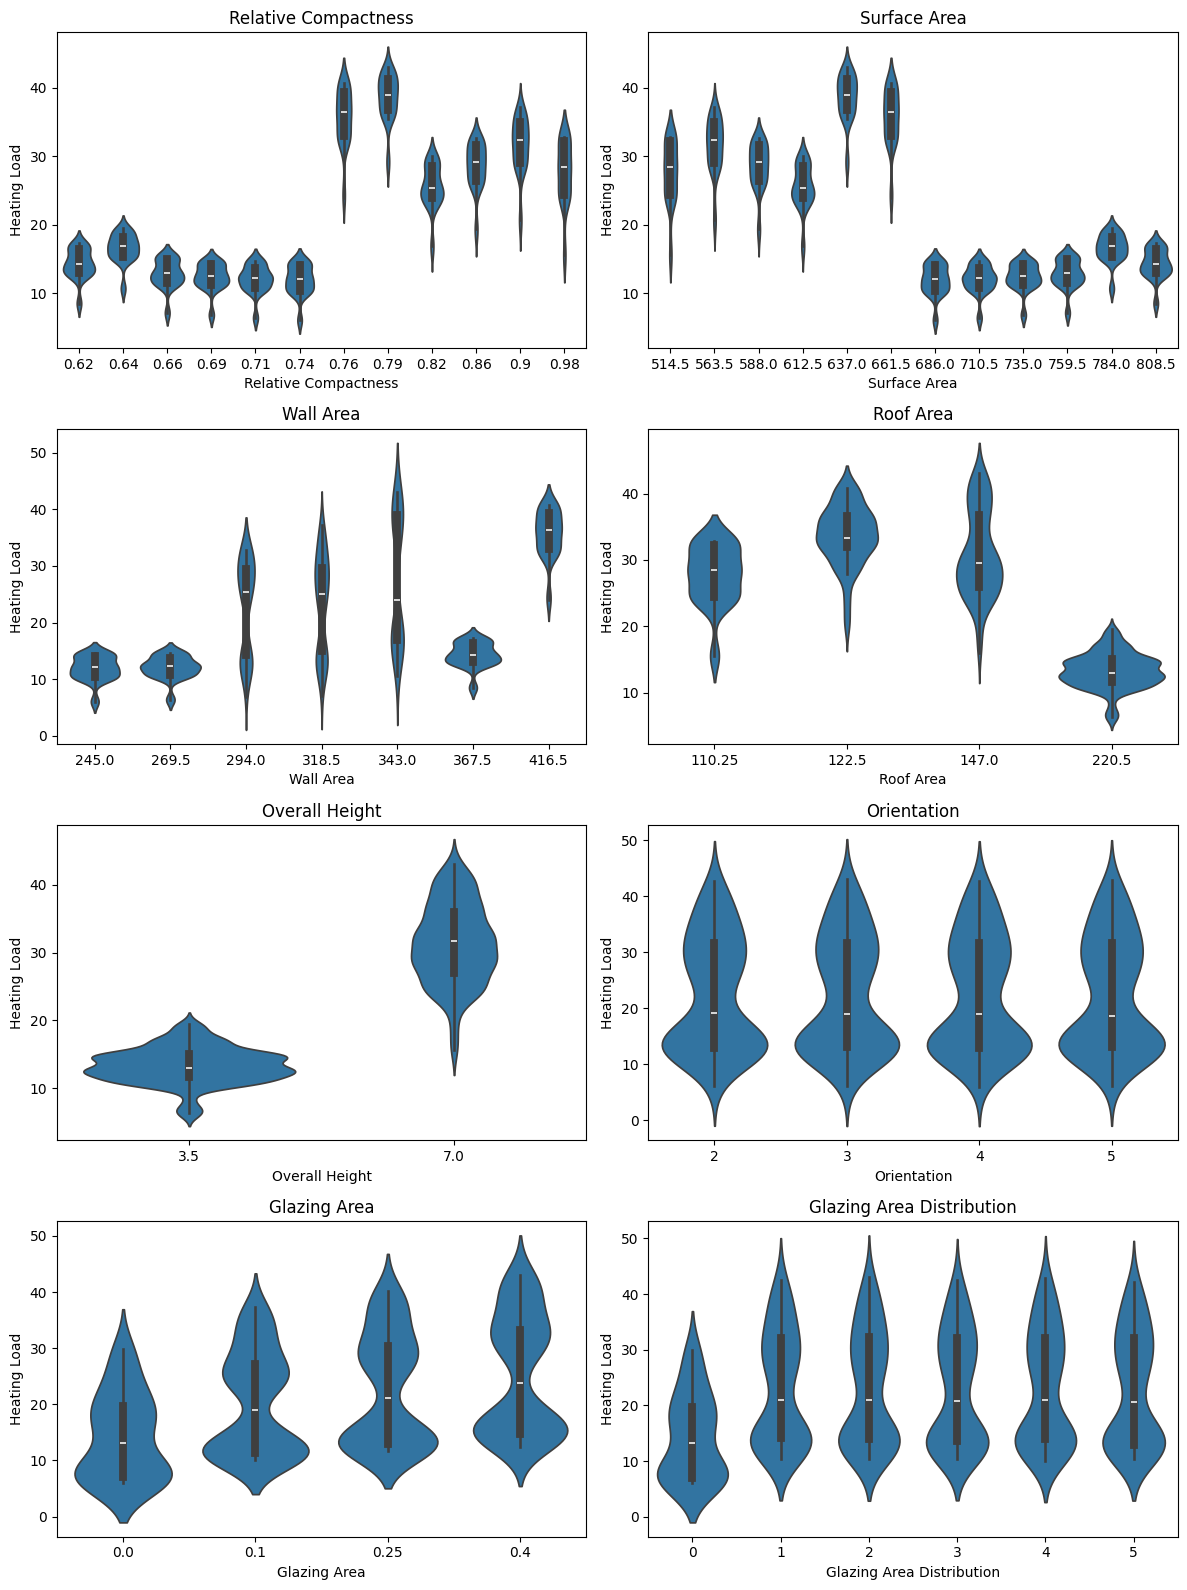

In [803]:
features  = cols[:-2]
fig, ax = plt.subplots(4, 2, figsize=(12, 4*4))
ax = ax.flatten()

for i, label in enumerate(features):
    sns.violinplot(x=dataset[label], y=dataset['Heating Load'], ax=ax[i])
    ax[i].set_title(label)

for j in range(i + 1, len(ax)):
    ax[j].axis("off")

plt.tight_layout()
plt.show()

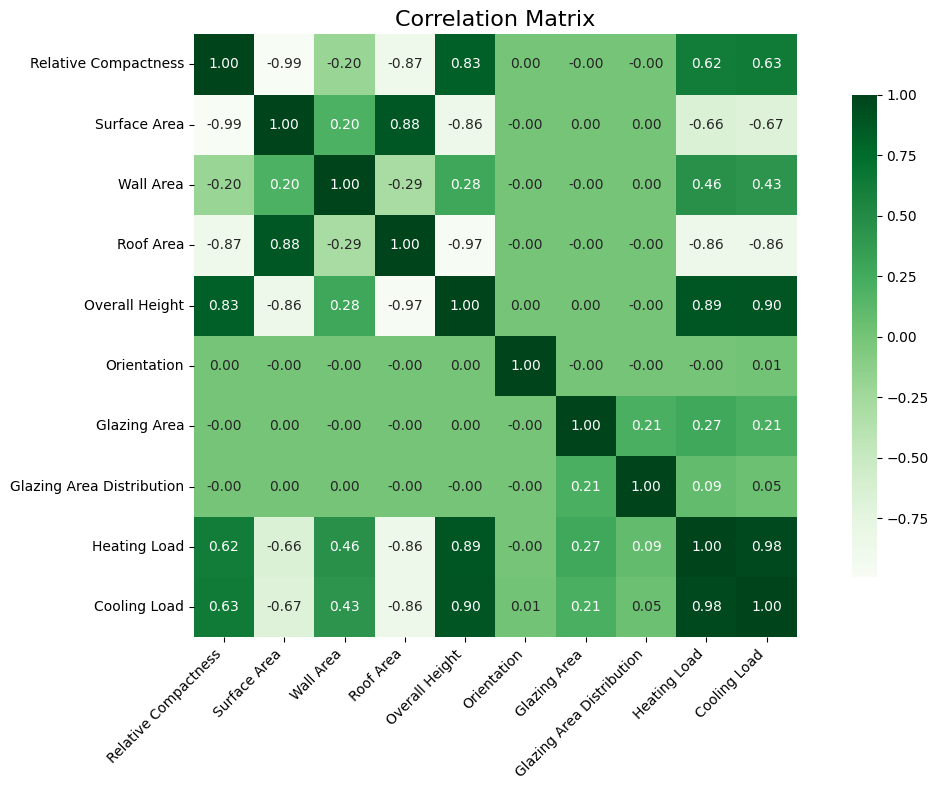

In [804]:
plt.figure(figsize=(12, 8)) 

sns.heatmap(
    dataset.corr(numeric_only=True),
    cmap="Greens",
    annot=True,
    fmt=".2f",       
    square=True,      
    cbar_kws={"shrink": 0.8} 
)

plt.title("Correlation Matrix", fontsize=16) 
plt.xticks(rotation=45, ha="right")           
plt.yticks(rotation=0)                        
plt.tight_layout()
plt.show()

1.2 Data cleaning

In [805]:
dataset.duplicated().sum()

np.int64(0)

In [806]:
dataset.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [807]:
dataset.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 587
Cooling Load                 636
dtype: int64

1.3 Feature Transformation

In [808]:
scaler = MinMaxScaler()

In [809]:
dataset_scaledd = dataset.iloc[:,:-2]
dataset_scaledd

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [810]:
scaled_values = scaler.fit_transform(dataset_scaledd)
dataset_scaled = pd.DataFrame(scaled_values, columns=dataset_scaledd.columns)
dataset_scaled

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0


In [811]:
dataset = pd.concat([dataset_scaled, dataset.iloc[:,-2:]], axis=1)
dataset

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,15.55,21.33
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,15.55,21.33
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,15.55,21.33
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,15.55,21.33
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,17.88,21.40
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,16.54,16.88
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,16.44,17.11
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,16.48,16.61


1.4 Split dataset

In [812]:
X = dataset.iloc[:,:-2]
y_heating = dataset["Heating Load"]
y_cooling = dataset["Cooling Load"]

In [813]:
X_train, X_test, y_heating_train, y_heating_test, y_cooling_train, y_cooling_test = train_test_split(X, y_heating, y_cooling, test_size=0.2, random_state=42)

In [814]:
len(X_train), len(X_test), len(y_heating_test), len(y_heating_train), len(y_cooling_test), len(y_cooling_train)

(614, 154, 154, 614, 154, 614)

2. Model Selection

2.1 Linear Regression Model

In [815]:
model_linear = LinearRegression()

In [ ]:
model_linear.fit(X_train, y_heating_train)

In [817]:
y_heating_test_pred = model_linear.predict(X_test)

In [818]:
mse = mean_squared_error(y_heating_test, y_heating_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_heating_test, y_heating_test_pred)

In [819]:
print("----------------------------------------------------")
print(" Linear Regression Model Summary")
print("----------------------------------------------------")
print(f"Intercept (bias): {model_linear.intercept_}")
print(f"Coefficients (weights):\n {model_linear.coef_}")
print("----------------------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"R² Score: {r2:.6f}")
print("----------------------------------------------------")

----------------------------------------------------
 Linear Regression Model Summary
----------------------------------------------------
Intercept (bias): 30.149699414687873
Coefficients (weights):
 [-22.27440753  -8.53153116   1.10909178 -12.23800182  14.43284222
  -0.09731734   8.05727699   1.05551417]
----------------------------------------------------
Mean Squared Error (MSE): 9.153208
Root Mean Squared Error (RMSE): 3.025427
R² Score: 0.912185
----------------------------------------------------


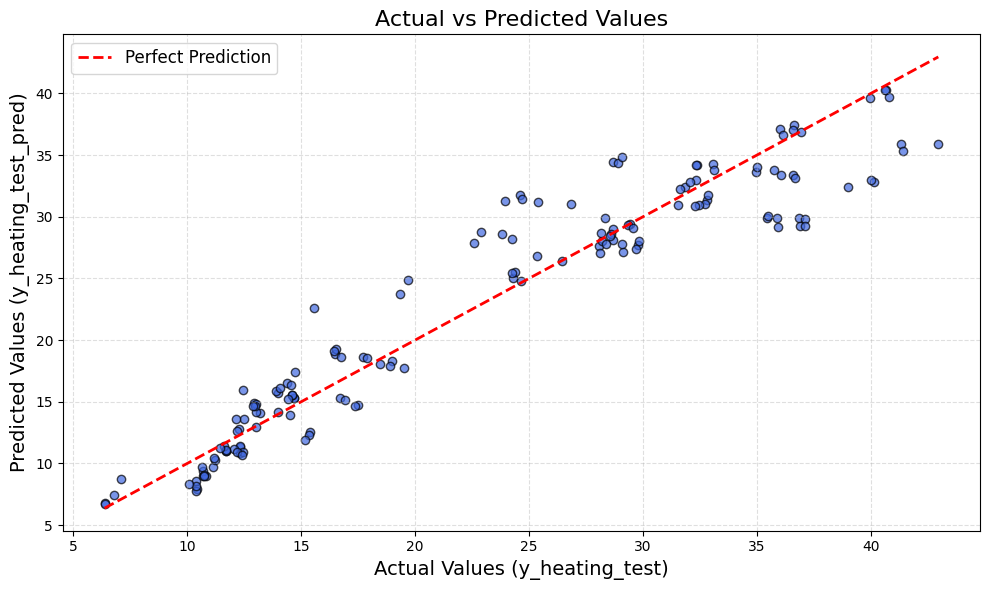

In [820]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred, color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(), y_heating_test_pred.min())
max_val = max(y_heating_test.max(), y_heating_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [821]:
# plt.scatter(y_heating_test, y_heating_test_pred, label="Data", color="blue")
# x = tf.linspace(-20, 40, 100)
# plt.plot(X_test, model_linear.predict(np.array(X_test).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
# plt.legend()
# plt.title("Bikes vs Temp")
# plt.ylabel("Number of bikes")
# plt.xlabel("Temp")
# plt.show()


# def try_parameters(w, b):
#     ages = non_smoker_df.age
#     target = non_smoker_df.charges

#     estimated_charges = estimate_charges(ages, w, b)

#     plt.plot(ages, estimated_charges, "r", alpha=0.9)
#     plt.scatter(ages, target, s=8, alpha=0.8)
#     plt.xlabel("Age")
#     plt.ylabel("Charges")
#     plt.legend(["Estimate", "Actual"])

# def estimate_output(x, w, b):
#     return w * x + b

2.2 SGD Regressor Model

In [822]:
model_sgd = SGDRegressor()

In [ ]:
model_sgd.fit(X_train, y_heating_train)

In [824]:
y_heating_test_pred_sgd = model_linear.predict(X_test)

In [825]:
mse = mean_squared_error(y_heating_test, y_heating_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_heating_test, y_heating_test_pred)

In [826]:
print("----------------------------------------------------")
print(" Linear Regression Model Summary")
print("----------------------------------------------------")
print(f"Intercept (bias): {model_linear.intercept_}")
print(f"Coefficients (weights):\n {model_linear.coef_}")
print("----------------------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"R² Score: {r2:.6f}")
print("----------------------------------------------------")

----------------------------------------------------
 Linear Regression Model Summary
----------------------------------------------------
Intercept (bias): 30.149699414687873
Coefficients (weights):
 [-22.27440753  -8.53153116   1.10909178 -12.23800182  14.43284222
  -0.09731734   8.05727699   1.05551417]
----------------------------------------------------
Mean Squared Error (MSE): 9.153208
Root Mean Squared Error (RMSE): 3.025427
R² Score: 0.912185
----------------------------------------------------


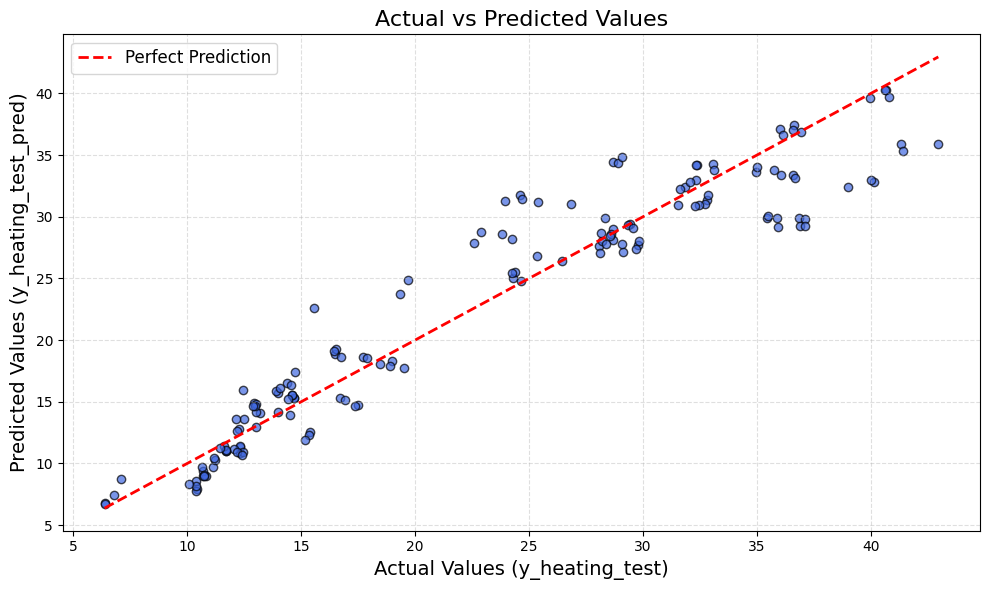

In [827]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred, color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(), y_heating_test_pred.min())
max_val = max(y_heating_test.max(), y_heating_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

2.3 TensorFlow Linear Model

In [828]:
tf.random.set_seed(42)

model_linear_tf = tf.keras.Sequential([ 
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_linear_tf.compile(loss = tf.keras.losses.mae, optimizer= tf.keras.optimizers.Adam(), metrics=["mae"])

history = model_linear_tf.fit(X_train, y_heating_train, epochs=30, verbose=0)

In [829]:
model_linear_tf.evaluate(X_test, y_heating_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.4355 - mae: 2.4355 


[2.3811709880828857, 2.3811709880828857]

In [830]:
y_heating_test_pred_tf_linear = model_linear_tf.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [831]:
tf.keras.metrics.MeanAbsoluteError()(y_heating_test, tf.squeeze(y_heating_test_pred_tf_linear))

<tf.Tensor: shape=(), dtype=float32, numpy=2.3811709880828857>

In [832]:
tf.keras.metrics.MeanSquaredError()(y_heating_test, tf.squeeze(y_heating_test_pred_tf_linear))

<tf.Tensor: shape=(), dtype=float32, numpy=10.971295356750488>

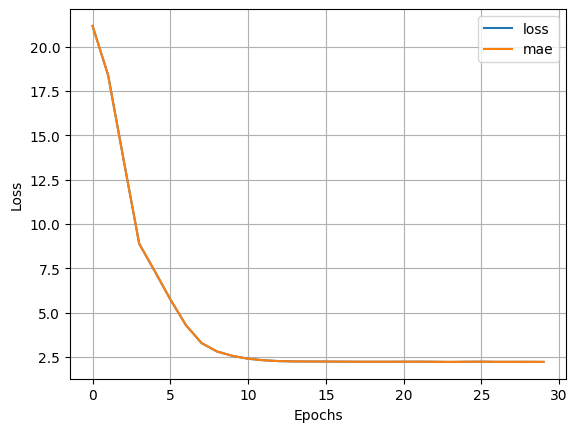

In [833]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid(True)

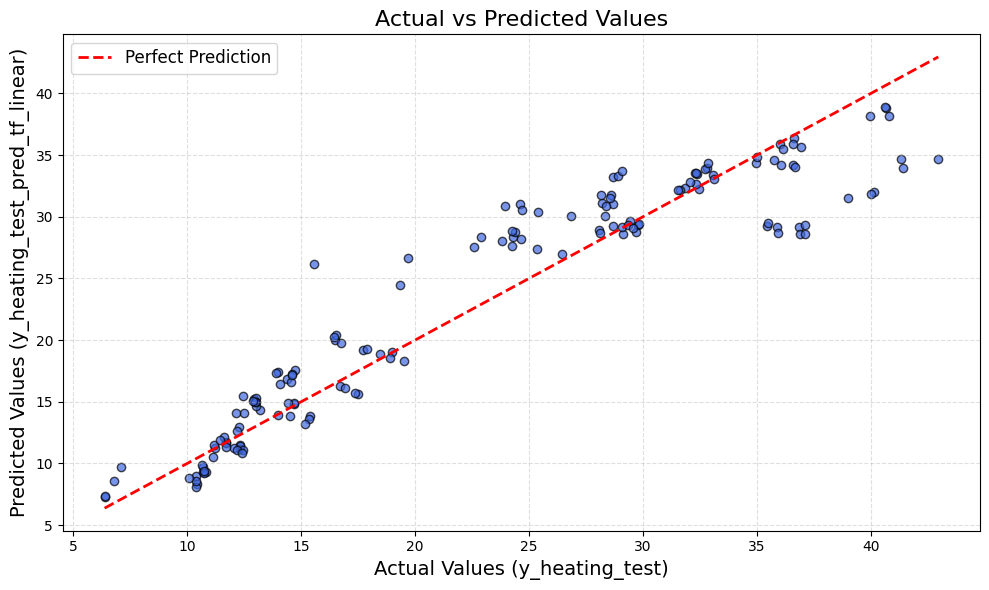

In [834]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred_tf_linear, color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(),y_heating_test_pred_tf_linear.min())
max_val = max(y_heating_test.max(), y_heating_test_pred_tf_linear.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred_tf_linear)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

2.4 TensorFlow NeuralNetwork Model

In [835]:
tf.random.set_seed(42)

nn_model_tf = tf.keras.Sequential([ 
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

nn_model_tf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mean_squared_error")

history = nn_model_tf.fit(X_train, y_heating_train, epochs = 30, verbose= 0)

In [836]:
nn_model_tf.evaluate(X_test, y_heating_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.1372  


9.317234992980957

In [837]:
y_heating_test_pred_tf_nn = nn_model_tf.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [838]:
tf.keras.metrics.MeanAbsoluteError()(y_heating_test, tf.squeeze(y_heating_test_pred_tf_nn))

<tf.Tensor: shape=(), dtype=float32, numpy=2.0885603427886963>

In [839]:
tf.keras.metrics.MeanSquaredError()(y_heating_test, tf.squeeze(y_heating_test_pred_tf_nn))

<tf.Tensor: shape=(), dtype=float32, numpy=9.317234992980957>

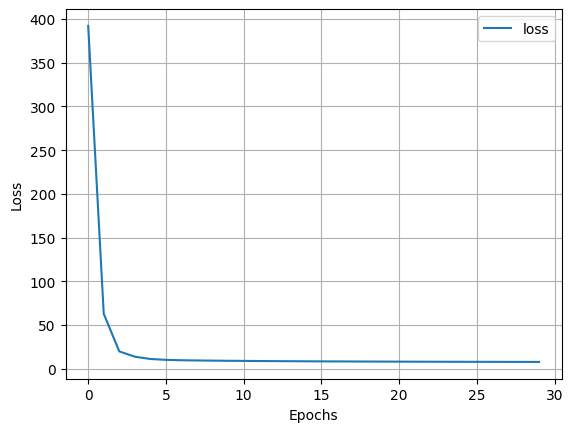

In [840]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid(True)

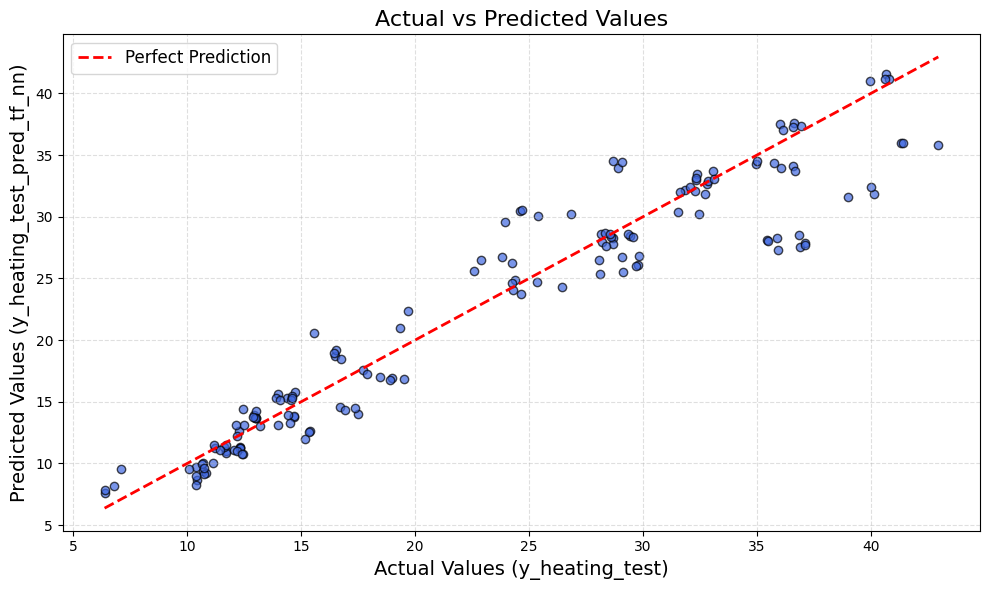

In [841]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred_tf_nn, color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(),y_heating_test_pred_tf_nn.min())
max_val = max(y_heating_test.max(), y_heating_test_pred_tf_nn.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred_tf_nn)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

2.5 PyTorch Linear Model

In [842]:
X_train = torch.from_numpy(X_train.values).type(torch.float32)
y_heating_train = torch.from_numpy(y_heating_train.values).type(torch.float32)
X_test = torch.from_numpy(X_test.values).type(torch.float32)
y_heating_test = torch.from_numpy(y_heating_test.values).type(torch.float32)

In [843]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=8, out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [844]:
torch.manual_seed(42)
model_pytorch_linear = LinearRegressionModel()

In [845]:
loss_fn = nn.MSELoss()
optimizer_1 = torch.optim.Adam(params = model_pytorch_linear.parameters(),lr=0.01)

In [846]:
torch.manual_seed(42)

epochs = 3000 # After several iterations, this was determined to be the optimal value.

epoch_count_1 = []
loss_values_1 = []
test_loss_values_1 = []

y_heating_train = y_heating_train.unsqueeze(1)
y_heating_test = y_heating_test.unsqueeze(1)

for epoch in range(epochs):
    model_pytorch_linear.train()
    
    y_pred_1 = model_pytorch_linear(X_train)
    
    loss_1 = loss_fn(y_pred_1, y_heating_train)
    
    optimizer_1.zero_grad()
    
    loss_1.backward()
    
    optimizer_1.step()

    model_pytorch_linear.eval()


    with torch.inference_mode():
        test_pred_1 = model_pytorch_linear(X_test)
        test_loss_1 = loss_fn(test_pred_1, y_heating_test)

    if epoch % 10 == 0:
        epoch_count_1.append(epoch)
        loss_values_1.append(loss_1)
        test_loss_values_1.append(test_loss_1)
        print(f"Epoch: {epoch} | Test: {loss_1} | Test loss: {test_loss_1}")
    
    y_heating_test_pred_pt_linear = test_pred_1



Epoch: 0 | Test: 562.6014404296875 | Test loss: 597.2597045898438
Epoch: 10 | Test: 540.3486328125 | Test loss: 574.363525390625
Epoch: 20 | Test: 518.71923828125 | Test loss: 552.0948486328125
Epoch: 30 | Test: 497.776123046875 | Test loss: 530.515625
Epoch: 40 | Test: 477.5546569824219 | Test loss: 509.66009521484375
Epoch: 50 | Test: 458.0670166015625 | Test loss: 489.5395812988281
Epoch: 60 | Test: 439.3106689453125 | Test loss: 470.1512145996094
Epoch: 70 | Test: 421.2745666503906 | Test loss: 451.48406982421875
Epoch: 80 | Test: 403.94390869140625 | Test loss: 433.5235290527344
Epoch: 90 | Test: 387.3019714355469 | Test loss: 416.2532043457031
Epoch: 100 | Test: 371.3311767578125 | Test loss: 399.6557922363281
Epoch: 110 | Test: 356.0138244628906 | Test loss: 383.71417236328125
Epoch: 120 | Test: 341.3320007324219 | Test loss: 368.4106750488281
Epoch: 130 | Test: 327.2678527832031 | Test loss: 353.7278747558594
Epoch: 140 | Test: 313.80352783203125 | Test loss: 339.64837646484375

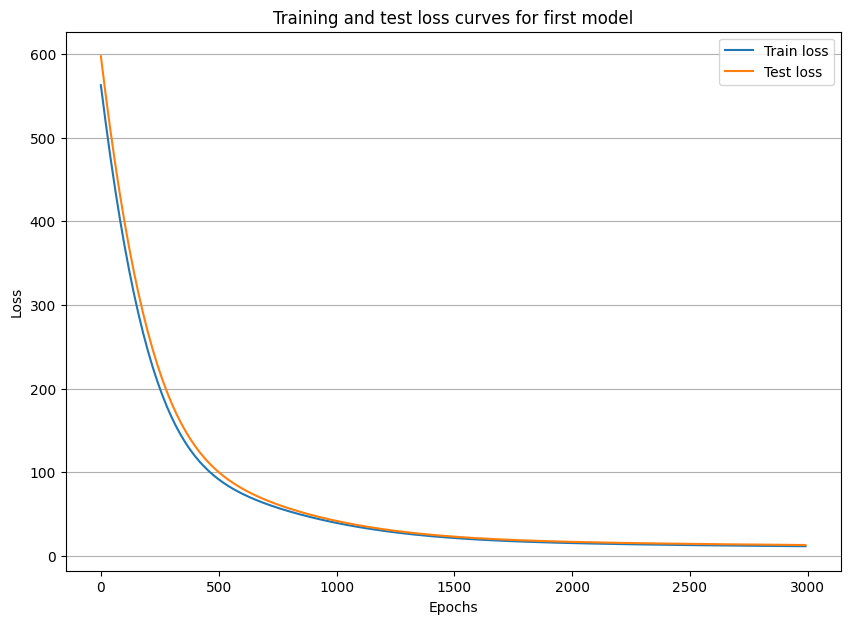

In [847]:
plt.figure(figsize=(10, 7))
plt.plot(epoch_count_1, np.array(torch.tensor(loss_values_1).numpy()), label="Train loss")
plt.plot(epoch_count_1, np.array(torch.tensor(test_loss_values_1).numpy()), label="Test loss")
plt.title("Training and test loss curves for first model")
plt.grid(visible=True, axis="y")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend() 
plt.show()

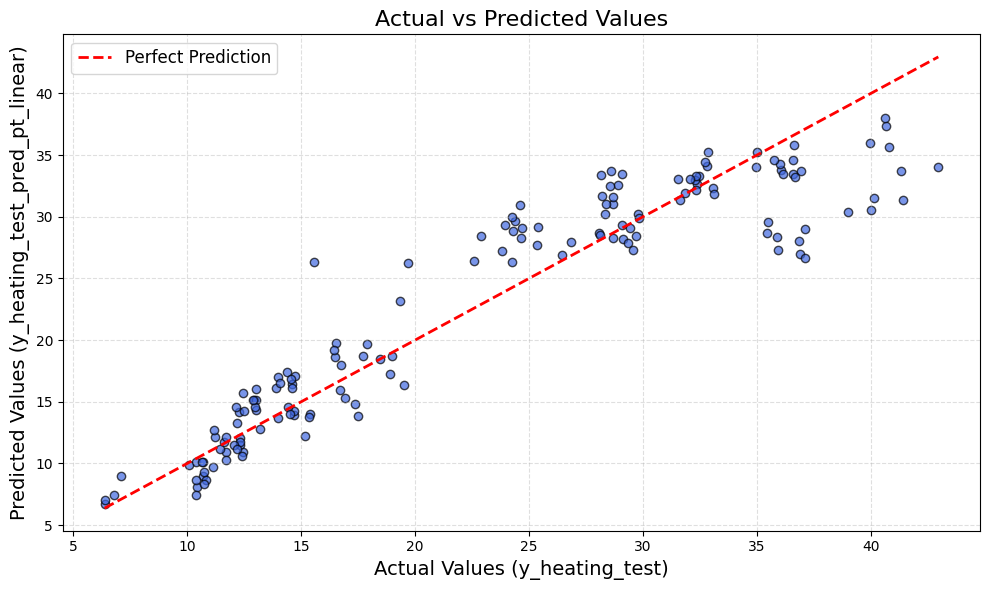

In [848]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred_pt_linear.detach().numpy(), color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(),y_heating_test_pred_pt_linear.detach().numpy().min())
max_val = max(y_heating_test.max(), y_heating_test_pred_pt_linear.detach().numpy().max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred_pt_linear)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

2.6 PyTorch NeuralNetwork Model

In [849]:
class NeuralNetworkModel(nn.Module):
    def __init__(self,):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=8, out_features=100)
        self.layer_2 = nn.Linear(in_features=100, out_features=100)
        self.layer_3 = nn.Linear(in_features=100, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_pytorch_nn = NeuralNetworkModel()
model_pytorch_nn

NeuralNetworkModel(
  (layer_1): Linear(in_features=8, out_features=100, bias=True)
  (layer_2): Linear(in_features=100, out_features=100, bias=True)
  (layer_3): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [850]:
torch.manual_seed(42)
model_pytorch_nn = LinearRegressionModel()

In [851]:
loss_bce = nn.MSELoss()
optimizer_2 = torch.optim.SGD(model_pytorch_nn.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)

epochs = 1000 # After several iterations, this was determined to be the optimal value.

epoch_count_2 = []
loss_values_2 = []
test_loss_values_2 = []

for epoch in range(epochs):
    model_pytorch_nn.train()
    
    y_pred_2 = model_pytorch_nn(X_train)
    
    loss_2 = loss_bce(y_pred_2, y_heating_train)
    
    optimizer_2.zero_grad()
    
    loss_2.backward()
    
    optimizer_2.step()

    model_pytorch_nn.eval()

    with torch.inference_mode():
        test_pred_2 = model_pytorch_nn(X_test).squeeze()
        test_loss_2 = loss_fn(test_pred_2, y_heating_test)

    if epoch % 10 == 0:
        epoch_count_2.append(epoch)
        loss_values_2.append(loss_2)
        test_loss_values_2.append(test_loss_2)
        print(f"Epoch: {epoch} | Test: {loss_2} | Test loss: {test_loss_2}")
    
    y_heating_test_pred_pt_nn = test_pred_2



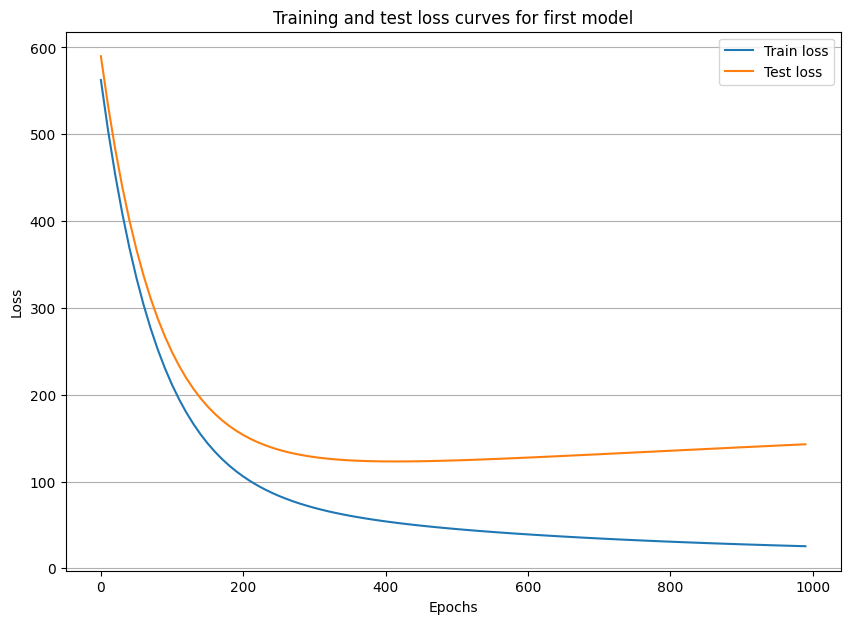

In [853]:
plt.figure(figsize=(10, 7))
plt.plot(epoch_count_2, np.array(torch.tensor(loss_values_2).numpy()), label="Train loss")
plt.plot(epoch_count_2, np.array(torch.tensor(test_loss_values_2).numpy()), label="Test loss")
plt.title("Training and test loss curves for first model")
plt.grid(visible=True, axis="y")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend() 
plt.show()

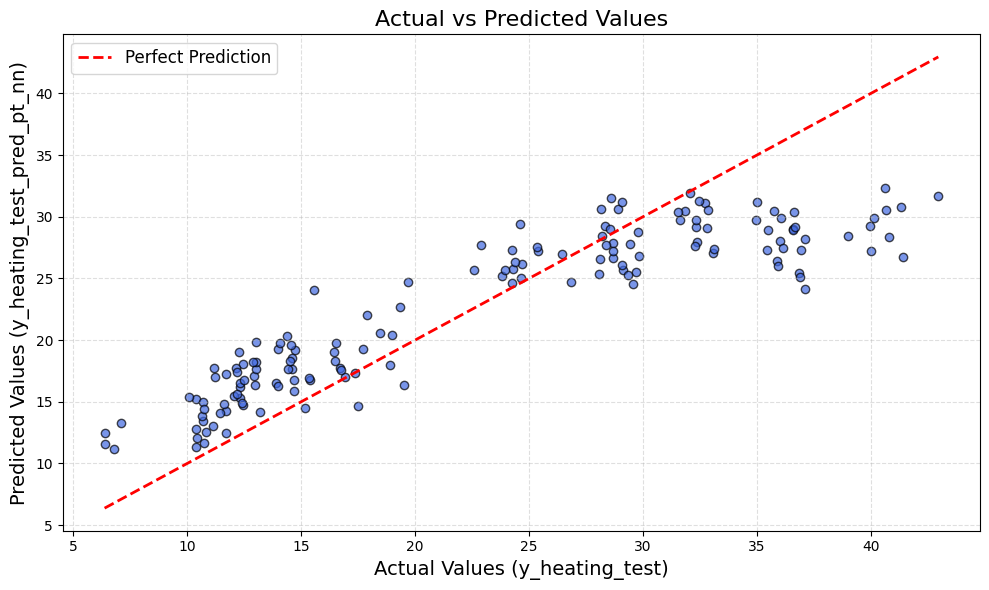

In [854]:
plt.figure(figsize=(10, 6))

plt.scatter(y_heating_test, y_heating_test_pred_pt_nn.detach().numpy(), color='royalblue', alpha=0.7, edgecolor='black')

min_val = min(y_heating_test.min(),y_heating_test_pred_pt_nn.detach().numpy().min())
max_val = max(y_heating_test.max(), y_heating_test_pred_pt_nn.detach().numpy().max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', linewidth=2,
         label='Perfect Prediction')

plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_heating_test)", fontsize=14)
plt.ylabel("Predicted Values (y_heating_test_pred_pt_nn)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()